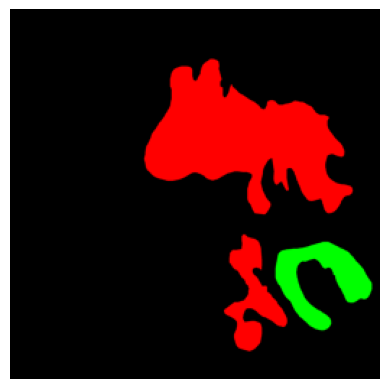

In [3]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

Image.MAX_IMAGE_PIXELS = None 

# Path to the directory
directory = 'data/train_mask_images'

# Check if the directory exists
if not os.path.exists(directory):
    print(f"Directory '{directory}' not found.")
else:
    # List all PNG files in the directory
    png_files = [file for file in os.listdir(directory) if file.endswith('.png')]

    # Randomly select a PNG file
    selected_file = random.choice(png_files)

    # Display the selected file
    image_path = os.path.join(directory, selected_file)
    with Image.open(image_path) as image:
        resized_image = image.resize((256, 256))
        plt.imshow(resized_image)
        plt.axis('off')  # Turn off axis numbers
        plt.show()


In [4]:
import numpy as np

image_array = np.array(resized_image)

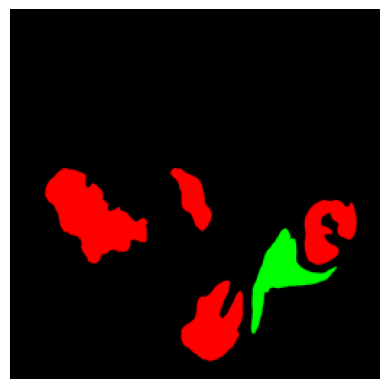

In [5]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

Image.MAX_IMAGE_PIXELS = None 


# List all PNG files in the directory
png_files = [file for file in os.listdir('data/train_mask_images') if file.endswith('.png')]

# Randomly select a PNG file
selected_file = random.choice(png_files)

# Display the selected file
image_path = os.path.join(directory, selected_file)
with Image.open(image_path) as image:
    resized_image = image.resize((256, 256))
    plt.imshow(resized_image)
    plt.axis('off')  # Turn off axis numbers
    plt.show()


In [2]:
import os
import pandas as pd
from PIL import Image
import numpy as np

Image.MAX_IMAGE_PIXELS = None
IMAGE_SIZE = 768

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('data/train.csv')

integer_to_mask = {
    0: 'tumor',
    1: 'stroma',
    2: 'necrosis',
}

mask_to_integer = {
    'tumor': 0,
    'stroma': 1,
    'necrosis': 2,
}

def process_image(row):
    image_id, height, width = row['image_id'], row['image_height'], row['image_width']
    if f'{image_id}.png' not in os.listdir('data/train_mask_images'):
        return []

    image_path = f'data/train_mask_images/{image_id}.png'
    
    path_mask_tuples = []

    print(f"processing image {image_id}")
    with Image.open(image_path) as image:
        image_array = np.array(image)
        print(height, width, image_array.shape)
        for i in range(0, height, IMAGE_SIZE):
            for j in range(0, width, IMAGE_SIZE):
                if not os.path.exists(f'tiles_{IMAGE_SIZE}/{image_id}/{i}_{j}.png'):
                    continue
                for i_color in range(3):
                    if (image_array[i:i+IMAGE_SIZE, j:j+IMAGE_SIZE, i_color] > 0).mean() > 0.9:
                        path_mask_tuples.append((f'tiles_{IMAGE_SIZE}/{image_id}/{i}_{j}.png', integer_to_mask[i_color]))

    return path_mask_tuples

all_the_tuples = []
for _, row in df.iterrows():
    all_the_tuples.extend(process_image(row))

# Create a DataFrame from the list of tuples
tuple_df = pd.DataFrame(all_the_tuples, columns=['image_path', 'mask_label'])

# Save the DataFrame as a CSV file
csv_file_path = f'tile_masks_{IMAGE_SIZE}.csv'
tuple_df.to_csv(csv_file_path, index=False)


processing image 66
48195 48871 (48195, 48871, 3)
processing image 1020
33751 36585 (33751, 36585, 3)
processing image 1101
18403 26306 (18403, 26306, 3)
processing image 1252
27480 60420 (27480, 60420, 3)
processing image 1925
32951 44847 (32951, 44847, 3)
processing image 1952
38053 33685 (38053, 33685, 3)
processing image 2227
40187 60063 (40187, 60063, 3)
processing image 2666
44031 53270 (44031, 53270, 3)
processing image 4211
34431 35243 (34431, 35243, 3)
processing image 4797
38587 53623 (38587, 53623, 3)
processing image 4963
48923 40708 (48923, 40708, 3)
processing image 5251
18704 105763 (18704, 105763, 3)
processing image 5851
28393 59353 (23308, 40224, 3)
processing image 5852
21963 71905 (21963, 71905, 3)
processing image 5992
28702 70863 (28702, 70863, 3)
processing image 6281
48293 75116 (43763, 50970, 3)
processing image 6558
38630 47083 (38630, 47083, 3)
processing image 6898
33146 38200 (33511, 37742, 3)
processing image 6951
35909 44544 (35909, 44544, 3)
processing i

In [3]:
tuple_df.groupby('mask_label').count() / tuple_df.groupby('mask_label').count().sum()

,image_path
mask_label,
necrosis,0.011715
stroma,0.057990
tumor,0.930295
